In [1]:
import pandas as pd
import operator

In [3]:
#pandas to read csv file
mobile = pd.read_csv("phones.csv")

In [4]:
del mobile["Product Name"]
del mobile["Brand Name"]
del mobile["Price"]
del mobile["Review Votes"]


mobile_five = mobile.loc[mobile['Rating'] == 5]
mobile_four = mobile.loc[mobile['Rating'] == 4]
mobile_three = mobile.loc[mobile['Rating'] == 3]
mobile_two = mobile.loc[mobile['Rating'] == 2]
mobile_one = mobile.loc[mobile['Rating'] == 1]

In [5]:
commonWords = ['the', 'be', 'to', 'of', 'and', 'a', 'in', 'that', 'have',
              'i', 'it', 'for', 'not', 'on', 'with', 'he', 'as', 'you',
              'do', 'at', 'this', 'but', 'his', 'by', 'from', 'they', 'we',
              'say', 'her', 'she', 'or', 'will', 'an', 'my', 'one', 'all',
              'would', 'there', 'their', 'what', 'so', 'up', 'out', 'if',
              'about', 'who', 'get', 'which', 'go', 'when', 'me', 'make',
              'can', 'like', 'time', 'no', 'just', 'him', 'know', 'take',
              'person', 'into', 'year', 'your', 'good', 'some', 'could',
              'them', 'see', 'other', 'than', 'then', 'now', 'look', 'only',
              'come', 'its', "it's", 'over', 'think', 'also', 'back', 'after',
              'use', 'two', 'how', 'our', 'work', 'first', 'well', 'way', 'even',
              'new', 'want', 'because', 'any', 'these', 'give', 'day', 'most', 'us',
               'who'
    ]

In [6]:
#### deletes the symbols out of the words for instance such as . and '
def del_sym(txt):
    del_symbols = ['.', "'", "!", "@", "#", "$", "%", "^", "&", "*", "(", ")", "{", "}",
                       "1", "2", "3", "4", "5", "6", "7", "8", "9", ":", ";", "<", ">", "?",
                       ",", "[", "]", "-", "_", "+", "="
                  ]
     
    i = 0
    while i < len(txt):
        if txt[i] in del_symbols:
            txt = txt[0:i] + txt[i+1:]
            i-=1
        i+=1
    return txt
    

#uncomment below to test function
#word = "hi''.a"
#words = "he344o&*o"
#del_sym(word)  
#del_sym(words)   

In [7]:
def addText(dataTable):
    sentence = ""
    for i in range(dataTable.shape[0]):
        word = str(dataTable.iloc[i]["Reviews"])
        sentence += " " + word
    return sentence

def deleteCommon(str):
    sentence = ""
    conden = str.split(" ")
    for i in range(len(conden)):
        if conden[i].lower() not in commonWords:
            sentence += " " + conden[i]
    return sentence

def rewriteText(dataTable):
    allData = deleteCommon(addText(dataTable))
    allDataSplit = allData.split(" ")
    d = {}
    for i in range(len(allDataSplit)):
        if allDataSplit[i] not in d:
            d[allDataSplit[i]] = 1
        else:
            d[allDataSplit[i]] += 1
            
    sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_d


one_text = rewriteText(mobile_one)
two_text = rewriteText(mobile_two)
three_text = rewriteText(mobile_one)
four_text = rewriteText(mobile_four)
five_text = rewriteText(mobile_five)

In [10]:
#another solution to solving getting rid of common/nonsignificant 
#words that do not have a positive or negative connotation
import matplotlib.pyplot as plt

def full_words(txt):
    array = []
    for i in txt:
        if len(i) == 2:
            first = del_sym(str(i[0]))
            second = i[1]
            new_item = (first, second)
            array.append(new_item)
    return array

test_one = full_words(one_text)
test_two = full_words(two_text)
test_three = full_words(three_text)
test_four = full_words(four_text)
test_five = full_words(five_text)

In [11]:
########The purpose of this function and the above function is basically to create a array of tuples from the original
########array of tuples but this new array has now cleaned up all the symbols for each word
########The below function creates a dictionary of the form {word length: # words with that word length}
########Example: {5: 100} means 100 words have 5 letters

def create_count(array):
    d = {}
    for i in array:
        if len(i[0]) in d:
            d[len(i[0])] += i[1]
        else:
            d[len(i[0])] = i[1]
    return d


##Below are dictionaries where the value is length of word and key is the number of words in the review text with that
##letter count
t_one = create_count(test_one)
t_two = create_count(test_two)
t_three = create_count(test_three)
t_four = create_count(test_four)
t_five = create_count(test_five)
print(t_one)

{5: 343185, 2: 112145, 3: 222264, 6: 261830, 4: 317841, 7: 218911, 0: 38386, 8: 126533, 9: 70075, 12: 14189, 10: 40615, 11: 22636, 1: 24137, 13: 7883, 14: 3299, 15: 1478, 17: 492, 16: 742, 19: 193, 21: 87, 18: 363, 20: 162, 22: 96, 24: 49, 23: 57, 52: 6, 25: 26, 71: 6, 59: 9, 28: 13, 39: 6, 58: 6, 26: 25, 119: 4, 43: 6, 37: 4, 29: 6, 131: 3, 79: 4, 108: 3, 38: 3, 53: 4, 280: 2, 94: 2, 54: 2, 163: 2, 45: 2, 125: 3, 113: 2, 81: 2, 36: 3, 128: 2, 30: 6, 27: 7, 64: 3, 33: 4, 146: 1, 61: 1, 55: 2, 65: 1, 46: 1, 34: 1, 86: 2, 31: 2, 40: 1, 32: 1, 44: 2, 51: 1, 42: 1, 90: 1, 139: 1, 56: 1, 70: 1, 63: 1, 66: 1, 68: 1, 62: 1, 121: 1}


In [12]:
##this function, from the t_one... etc variables, grabs only the words of length x(any length) 
##that occur more than y times 
def filt(dic, y):
    d = {}
    for x in dic:
         if dic[x] > y:
                d[x] = dic[x]
    return d


In [13]:
import matplotlib.pyplot as plt

In [14]:
#used data from create_count function
ones = filt(t_one, 100000)
twos = filt(t_two, 10000)
threes = filt(t_three, 100000)
fours = filt(t_four, 100000)
fives = filt(t_five, 100000)

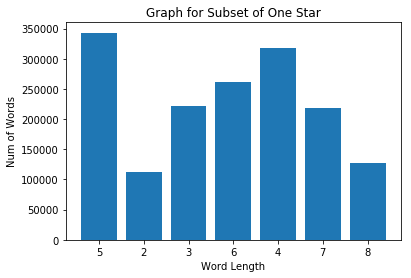

In [15]:
plt.bar(range(len(ones)), list(ones.values()), align='center')
plt.xticks(range(len(ones)), list(ones.keys()))
plt.ylabel('Num of Words')
plt.xlabel('Word Length')
plt.title('Graph for Subset of One Star')
plt.show()

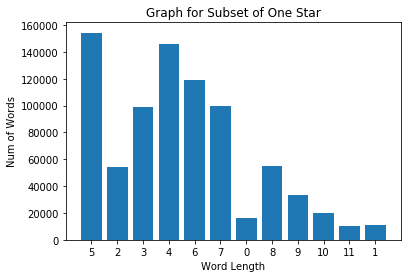

In [16]:
plt.bar(range(len(twos)), list(twos.values()), align='center')
plt.xticks(range(len(twos)), list(twos.keys()))
plt.ylabel('Num of Words')
plt.xlabel('Word Length')
plt.title('Graph for Subset of One Star')
plt.show()

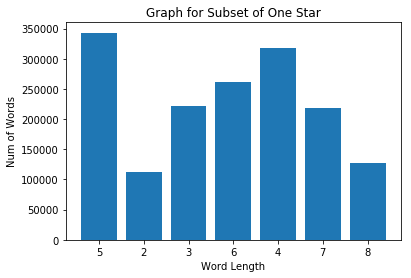

In [17]:
plt.bar(range(len(threes)), list(threes.values()), align='center')
plt.xticks(range(len(threes)), list(threes.keys()))
plt.ylabel('Num of Words')
plt.xlabel('Word Length')
plt.title('Graph for Subset of One Star')
plt.show()

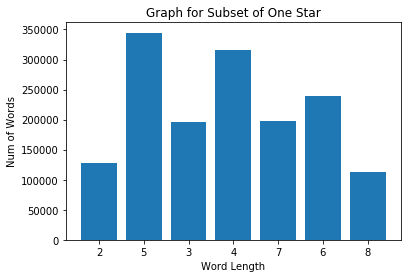

In [18]:
plt.bar(range(len(fours)), list(fours.values()), align='center')
plt.xticks(range(len(fours)), list(fours.keys()))
plt.ylabel('Num of Words')
plt.xlabel('Word Length')
plt.title('Graph for Subset of One Star')
plt.show()

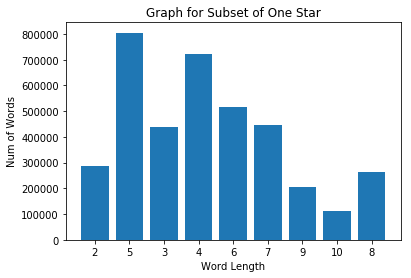

In [19]:
plt.bar(range(len(fives)), list(fives.values()), align='center')
plt.xticks(range(len(fives)), list(fives.keys()))
plt.ylabel('Num of Words')
plt.xlabel('Word Length')
plt.title('Graph for Subset of One Star')
plt.show()